#NORMALIZATION AND STANDARDIZTION OF FEATURES

WHY TRANSFORMATION OF FEATURES IS IMPORTANT ?
IT IS BECAUSE OF SOME OF THE FOLLOWING REASONS....

1. IN CNN WE WORK WITH GRADIENT DESCENT , IN LINEAR REGRESSION WE WORK WITH SLOPES AND ,
IN IN KNN OR NEAREST NEIGHBOUR ALGORITHMS WE WORK WITH EUCLEDIAN DISTANCE SO IF THE VALUES
ARE LARGE ENOUGH THEN THERE WILL BE THE VARIATIONS IN THE PROCESSING AND IT CAN LEAD TO THE ESTIMATION 
OF THE WRONG COEFFICIENTS SO TO AVOID THESE SIMPLY STANDARDIZE THESE VALUES , SO THAT THESE VALUES WILL BE CLOSER 
AND ALSO THE OUR MODEL WILL GRT TRAINED MORE EFFICIENTLY.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = pd.read_csv('train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [7]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [8]:
#checking for the null values
df.isnull()

,Survived,Pclass,Age,Fare
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
886,False,False,False,False
887,False,False,False,False
888,False,False,True,False
889,False,False,False,False


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [10]:
#so sge has null values so filling age with median values

df['Age'].fillna(df.Age.median(),inplace=True)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [12]:
#we are going to use the standard scaler from the sklearn
from sklearn.preprocessing import StandardScaler

In [13]:
#creating the object
scaler=StandardScaler()

In [14]:
scaled_data = scaler.fit_transform(df)

In [15]:
scaled_data

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [16]:
scaled_data_dataframe = pd.DataFrame(scaled_data)

In [17]:
scaled_data_dataframe

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [18]:
#for visualizing it
import matplotlib.pyplot as plt

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <a list of 10 Patch objects>)

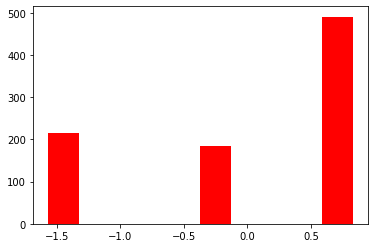

In [30]:
plt.hist(scaled_data[:,1],bins=10,color = 'red')

#Now we will see how to perform the minmax scaling

formula for the minmax scaling is 
x_scaled = (x - x_min)/(x_max - x_min)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
min_max_data = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [24]:
min_max_data.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


In [25]:
#so by using this formula for the minmax scaling is x_scaled = (x - x_min)/(x_max - x_min) all the values are being setted up

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

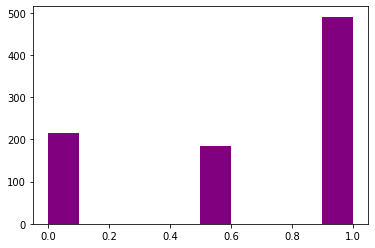

In [32]:
plt.hist(min_max_data['Pclass'],bins =10,color='purple')